Határozzuk meg az alábbi ábrán látható tartó súlypontvonalának eltolódását leíró $v\left(x\right)$ függvényt végeselemes módszer használatával, síkbeli egyenes gerendalemek alkalmazásával.
Vizsgáljuk meg a végeselemes megoldással kapott hajlítónyomatéki igénybevétel hibáját az egyes szakaszokon.
Határozzuk meg az $x = a/2$ keresztmetszetben a hajlítónyomatéki igénybevétel nagyságát 2, illetve 3 síkbeli egyenes gerendaelem alkalmazásával.
A tartók két különböző átmérőjű ($d_1 = 2d$, illetve $d_2 = d$) kör keresztmetszetű tartókból
vannak összeépítve.
A tartók anyaga lineárisan rugalmas, homogén, izotrop. A $d_1$ átmérőjű rész rugalmassági modulusza $E$, míg a $d_2$ átmérővel rendelkező részé $4E$.

# Analitikus megoldás rugalmasszál DE. alapján

In [212]:
import sympy as sp
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

sp.init_printing()

In [2]:
MA, Ax, Ay, By = sp.symbols("M_A, A_x, A_y, B_y")
p0, F1, M1, = sp.symbols("p_0, F_1, M_1")
I, I1, I2, E, E1, E2, a, b, d, x = sp.symbols("I, I_1, I_2, E, E_1, E_2, a, b, d, x")
a, b, d, x = sp.symbols("a, b, d, x")

NameError: name 'sp' is not defined

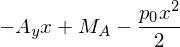

In [214]:
Mh1 = MA - Ay*x - p0*x**2/2
Mh1

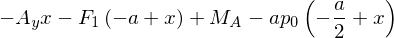

In [215]:
Mh2 = MA - Ay*x - p0*a*(x-a/2) - F1*(x-a)
Mh2

In [216]:
c1, c2, c3, c4 = sp.symbols("c1, c2, c3, c4")

In [217]:
fi1 = sp.integrate(-Mh1/(I1*E1),x) + c1
v1 = sp.integrate(fi1,x) + c2

In [218]:
fi2 = sp.integrate(-Mh2/(I2*E2),x) + c3
v2 = sp.integrate(fi2,x) + c4

In [219]:
statFx = Ax
statFy = Ay + p0*a + F1 + By
statMz = MA + p0*a**2/2 + F1*a + M1 + By*(a+b)

In [220]:
pf1 = fi1.subs([(x,0)])
pf2 = v1.subs([(x,0)])
pf3 = v2.subs([(x,a+b)])

if1 = (fi1 - fi2).subs([(x,a)])
if2 = (v1 - v2).subs([(x,a)])

In [221]:
mego = sp.solve([statFx,statFy,statMz,pf1,pf2,pf3,if1,if2],[MA,Ax,Ay,By,c1,c2,c3,c4])

In [222]:
adat=[(a,800e-3),(b,400e-3),(d,20e-3),(E,50e9),(F1,2500),(M1,-500),(p0,-5000)]
adat2 = [(E1,E),(E2,4*E),(I1, (2*d)**4*np.pi/64), (I2, (d)**4*np.pi/64)]

In [223]:
MA.subs(mego).subs(adat2).subs(adat)

In [224]:
Ay.subs(mego).subs(adat2).subs(adat)

In [225]:
By.subs(mego).subs(adat2).subs(adat)

In [226]:
v1num = sp.lambdify(x,v1.subs(mego).subs(adat2).subs(adat))
v1num(x)

In [227]:
v2num = sp.lambdify(x,v2.subs(mego).subs(adat2).subs(adat))
v2num(x)

In [228]:
fi1num = sp.lambdify(x,fi1.subs(mego).subs(adat2).subs(adat))
fi1num(x)

In [229]:
fi2num = sp.lambdify(x,fi2.subs(mego).subs(adat2).subs(adat))
fi2num(x)

In [230]:
Mh1num = sp.lambdify(x,Mh1.subs(mego).subs(adat2).subs(adat))
Mh1num(x)

In [231]:
Mh2num = sp.lambdify(x,Mh2.subs(mego).subs(adat2).subs(adat))
Mh2num(x)

In [232]:
x1Lista= np.linspace(0,float(a.subs(adat)), num = 20)
x1Lista

array([ 0.        ,  0.04210526,  0.08421053,  0.12631579,  0.16842105,
        0.21052632,  0.25263158,  0.29473684,  0.33684211,  0.37894737,
        0.42105263,  0.46315789,  0.50526316,  0.54736842,  0.58947368,
        0.63157895,  0.67368421,  0.71578947,  0.75789474,  0.8       ])

In [233]:
x2Lista = np.linspace(float(a.subs(adat)),float((a+b).subs(adat)), num = 20)
x2Lista

array([ 0.8       ,  0.82105263,  0.84210526,  0.86315789,  0.88421053,
        0.90526316,  0.92631579,  0.94736842,  0.96842105,  0.98947368,
        1.01052632,  1.03157895,  1.05263158,  1.07368421,  1.09473684,
        1.11578947,  1.13684211,  1.15789474,  1.17894737,  1.2       ])

In [234]:
xLista = np.concatenate((x1Lista,x2Lista))

In [235]:
vLista = np.concatenate(([v1num(x) for x in x1Lista],[v2num(x) for x in x2Lista]))

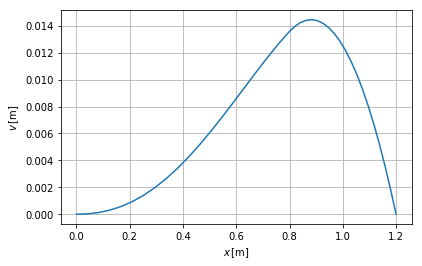

In [236]:
figv = plt.figure(num = 1, figsize=(16/2.54,10/2.54))
axv = figv.add_subplot(111)

axv.plot(xLista,vLista)

plt.xlabel(r"$x \, \left[\mathrm{m}\right]$")
plt.ylabel(r"$v \, \left[\mathrm{m}\right]$")

plt.grid()
plt.legend()
plt.show()

In [237]:
fiLista = np.concatenate(([fi1num(x) for x in x1Lista],[fi2num(x) for x in x2Lista]))

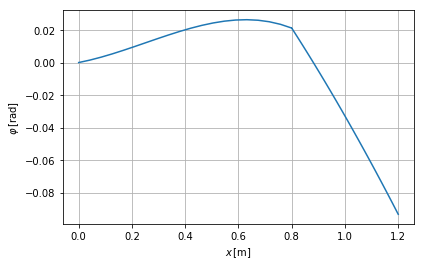

In [238]:
figfi = plt.figure(num = 2, figsize=(16/2.54,10/2.54))
axfi = figfi.add_subplot(111)

axfi.plot(xLista,fiLista)

plt.xlabel(r"$x \, \left[\mathrm{m}\right]$")
plt.ylabel(r"$\varphi \, \left[\mathrm{rad}\right]$")

plt.grid()
plt.legend()
plt.show()

In [239]:
MhLista = np.concatenate(([Mh1num(x) for x in x1Lista],[Mh2num(x) for x in x2Lista]))

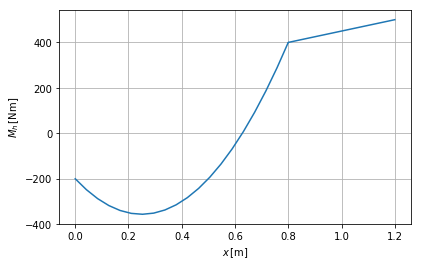

In [240]:
figMh = plt.figure(num = 3, figsize=(16/2.54,10/2.54))
axMh = figMh.add_subplot(111)

axMh.plot(xLista,MhLista)

plt.xlabel(r"$x \, \left[\mathrm{m}\right]$")
plt.ylabel(r"$M_h \, \left[\mathrm{Nm}\right]$")

plt.grid()
plt.legend()
plt.show()

In [241]:
V1 = sp.diff(-Mh1,x)
V1num = sp.lambdify(x,V1.subs(mego).subs(adat2).subs(adat))
V2 = sp.diff(-Mh2,x)
V2num = sp.lambdify(x,V2.subs(mego).subs(adat2).subs(adat))

In [242]:
VLista = np.concatenate(([V1num(x) for x in x1Lista],[V2num(x) for x in x2Lista]))

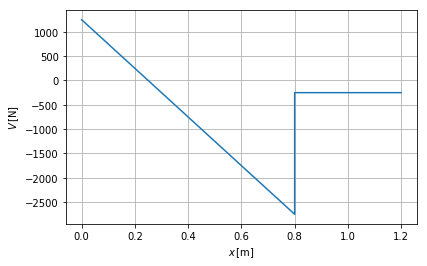

In [243]:
figV = plt.figure(num = 4, figsize=(16/2.54,10/2.54))
axV = figV.add_subplot(111)

axV.plot(xLista,VLista)

plt.xlabel(r"$x \, \left[\mathrm{m}\right]$")
plt.ylabel(r"$V \, \left[\mathrm{N}\right]$")

plt.grid()
plt.legend()
plt.show()